<a href="https://colab.research.google.com/github/renatachavezm22/Regresion_Lineal/blob/main/Actividad_6_1_(Regresi%C3%B3n_Lineal_Simple).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Actividad 6.1 (Regresión Lineal Simple)**

## Renata Emilia Chávez Martínez


In [ ]:
#Importamos librerías requeridas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Carga desde un archivo .xlsx sin indice
Mexico= pd.read_csv("DF_Mexico (2).csv")
EUA = pd.read_csv("California_EUA.csv", encoding='unicode_escape')
Espana = pd.read_csv("Girona_España.csv", encoding='unicode_escape')

## **Procesamiento de datos**

### **EUA**

#### **Limpieza de los datos**

In [ ]:
EUA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6936 entries, 0 to 6935
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   ï»¿id                                         6936 non-null   float64
 1   listing_url                                   6936 non-null   object 
 2   scrape_id                                     6936 non-null   float64
 3   last_scraped                                  6936 non-null   object 
 4   source                                        6936 non-null   object 
 5   name                                          6936 non-null   object 
 6   description                                   6889 non-null   object 
 7   neighborhood_overview                         4850 non-null   object 
 8   picture_url                                   6936 non-null   object 
 9   host_id                                       6936 non-null   i

In [ ]:
valores_nulos1=EUA.isnull().sum()
print(valores_nulos1)

ï»¿id                                              0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
source                                             0
                                                ... 
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                               1325
Length: 75, dtype: int64


In [ ]:
valores_nulost=EUA.isnull().sum().sum()
print(valores_nulost)

48877


Como podemos ver en la base de datos tenemos 48,877 datos nulos los cuales nos afecatran en la investigación que realizamos. Primeramente hare una limpieza del DataFrame, esta para limpiar aquellos datos númericos con la media (considerando que esta función aritmetica nos dice un comportamiento regular de la columan). Posteriormente, usaremos el metodo que utilice valores previos como indicadores o como sustitutos para valores NaN considerando que puede ser la moda que se tenga por parte de la columna

In [ ]:
EUA1=EUA.copy()

In [ ]:
EUA1=EUA1.fillna(round(EUA.mean(),1))
EUA1.isnull().sum().sum()

<ipython-input-7-c00d2d475587>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  EUA1=EUA1.fillna(round(EUA.mean(),1))


37071

In [ ]:
EUA1=EUA1.fillna(method='bfill')
EUA1.isnull().sum().sum()

20821

In [ ]:
nulos = EUA1.isnull().any()
print(EUA1.loc[:,nulos])

                                             host_about host_acceptance_rate  \
0     We are a family of four that live upstairs.  W...                 100%   
1     Philip: English transplant to the Bay Area and...                  71%   
2     7 minutes walk to UCSF hospital & school campu...                  73%   
3     I'm an Interior Stylist living in SF. \r\n\r\n...                   0%   
4     Ivan is a publisher of a book for 4 year olds....                  90%   
...                                                 ...                  ...   
6931                                                NaN                 100%   
6932                                                NaN                  50%   
6933                                                NaN                  50%   
6934                                                NaN                  50%   
6935                                                NaN                  NaN   

      neighbourhood_group_cleansed  bat

Vemos que tenemos 3 columnas que las cuales tenemos demasiados valores NaN, viendo y analizando a fondo dichas columnas vemos que podemos hacer una limpieza singular a cada una de esas en las cuales sustituiremos los valores NaN respectivamente a los valores que creemos indicados.

En la parte de neighbour_group_cleansed, vemos que llega a ser inclusive una columna conjunta a la de neighbourhood_cleansedneigh por lo cual eliminaremos dicha columna.

En la de los baños tomaremos los valores de la columan de a lado y usando lambda utilizaremos una expresión regular para eliminar todas las letras. 

En la tercer columna vemos que no tiene valores, por lo cual la eliminaremos.



In [ ]:
EUA1=EUA1.drop(['neighbourhood_group_cleansed', 'calendar_updated'], axis=1)
EUA1.isnull().sum().sum()

6949

In [ ]:
import re
EUA1['bathrooms']=EUA1['bathrooms'].fillna(EUA1['bathrooms_text'])
EUA1['bathrooms'] = EUA1['bathrooms'].apply(lambda x: re.sub('[^0-9]', '', x))
EUA1['bathrooms']

0        1
1        1
2        4
3       15
4        1
        ..
6931     1
6932     1
6933     1
6934     1
6935     1
Name: bathrooms, Length: 6936, dtype: object

In [ ]:
EUA1.isnull().sum().sum()

13

Como podemos ver ya no tenemos datos nulos considerando que eliminamos dos columnas que una no tenia relevancia considerando que otra ya tenia el contenido y una que no tenia información alguna. La de baños decidí hacer todo el procedimiento de tomar la de texto considerando que será necesario para la segunda parte de esta evaluación.

In [ ]:
EUA1=EUA1.dropna(axis=0)
EUA1.isnull().sum().sum()

0

In [ ]:
EUA1

,ï»¿id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,9.580000e+02,https://www.airbnb.com/rooms/958,2.020000e+13,06/03/2023,city scrape,"Bright, Modern Garden Unit - 1BR/1BTH",Our bright garden unit overlooks a lovely back...,Quiet cul de sac in friendly neighborhood<br /...,https://a0.muscache.com/pictures/b7c2a199-4c17...,1169,...,4.88,4.98,4.76,City Registration Pending,f,1,1,0,0,2.31
1,5.858000e+03,https://www.airbnb.com/rooms/5858,2.020000e+13,06/03/2023,city scrape,Creative Sanctuary,We live in a large Victorian house on a quiet ...,I love how our neighborhood feels quiet but is...,https://a0.muscache.com/pictures/17714/3a7aea1...,8904,...,4.85,4.77,4.68,STR-0000264,f,1,1,0,0,0.66
2,8.142000e+03,https://www.airbnb.com/rooms/8142,2.020000e+13,06/03/2023,city scrape,Friendly Room Apt. Style -UCSF/USF - San Franc...,Nice and good public transportation. 7 minute...,"N Juda Muni, Bus and UCSF Shuttle.<br /><br />...",https://a0.muscache.com/pictures/12d8bff0-1698...,21994,...,4.78,4.67,4.67,STR-0000264,f,13,0,13,0,0.09
3,8.339000e+03,https://www.airbnb.com/rooms/8339,2.020000e+13,06/03/2023,city scrape,Historic Alamo Square Victorian,Pls email before booking. <br />Interior featu...,Located between Valencia Street and Dolores Pa...,https://a0.muscache.com/pictures/miso/Hosting-...,24215,...,5.00,4.94,4.75,STR-0000264,f,2,2,0,0,0.17
4,8.739000e+03,https://www.airbnb.com/rooms/8739,2.020000e+13,06/03/2023,city scrape,"Mission Sunshine, with Private Bath","Welcome to ""The Mission,"" the sunniest neighbo...",Located between Valencia Street and Dolores Pa...,https://a0.muscache.com/pictures/80811/7a57d0e...,7149,...,4.96,4.93,4.74,STR-0000028,f,2,0,2,0,4.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6926,8.170000e+17,https://www.airbnb.com/rooms/817067809700979706,2.020000e+13,06/03/2023,city scrape,Modern Room in San Francisco - 8,Beautiful comfortable room in a quiet neighbor...,Home is located in the Bayview area overlookin...,https://a0.muscache.com/pictures/miso/Hosting-...,222540569,...,5.00,4.56,4.89,2022-012006STR,f,7,0,7,0,8.44
6927,8.170000e+17,https://www.airbnb.com/rooms/817390268252267687,2.020000e+13,06/03/2023,city scrape,Charming hotel room in downtown,Enjoy easy access to popular shops and restaur...,Russian Hill is directly to the north (and sli...,https://a0.muscache.com/pictures/miso/Hosting-...,486687635,...,5.00,5.00,5.00,Exempt,f,26,0,26,0,1.00
6928,8.180000e+17,https://www.airbnb.com/rooms/817535225433481370,2.020000e+13,06/03/2023,city scrape,Unique custom loft - South Beach,Historical loft building in safe+clean South B...,This residential neighborhood is quiet with fa...,https://a0.muscache.com/pictures/miso/Hosting-...,9835117,...,4.90,4.80,4.70,147904,f,1,1,0,0,1.30
6929,8.180000e+17,https://www.airbnb.com/rooms/817686120681200035,2.020000e+13,06/03/2023,city scrape,SF Spacious Room w/Kitchen/Patio/ComfyBed/Laundry,Our home is carefully designed for long-term s...,This residential neighborhood is quiet with fa...,https://a0.muscache.com/pictures/miso/Hosting-...,226555948,...,4.90,4.80,4.70,147904,f,14,3,11,0,1.30


#### **Eliminación de Outliers (Rango Intercuartílico)**

Haciendo diversas actividades así como desarrollando este modelo es que considero que el método de eliminación de outliers considerando que este es un modelo mucho más robusto que el de desviación consisderanod que este puede manejar mejor esos valores atipicos que se tienen dado que tomamos los valores que están por debajo del primer cuartil menos 1.5 veces el rango intercuartílico o por encima del tercer cuartil más 1.5 veces el rango intercuartílico se consideran outliers.

Primeramente solo checaremos los datos númericos y después haremos una visualización de los datos.

In [ ]:
EUA_int=EUA1.select_dtypes(include=['int64'])
EUA_decimales=EUA1.select_dtypes(include=['float'])
EUA_cuali=EUA1.select_dtypes(include=['object'])

EUA_numeros=pd.concat([EUA_int,EUA_decimales],axis=1)
EUA_numeros.isnull().sum()

host_id                                         0
host_listings_count                             0
host_total_listings_count                       0
accommodates                                    0
minimum_nights                                  0
maximum_nights                                  0
availability_30                                 0
availability_60                                 0
availability_90                                 0
availability_365                                0
number_of_reviews                               0
number_of_reviews_ltm                           0
number_of_reviews_l30d                          0
calculated_host_listings_count                  0
calculated_host_listings_count_entire_homes     0
calculated_host_listings_count_private_rooms    0
calculated_host_listings_count_shared_rooms     0
ï»¿id                                           0
scrape_id                                       0
latitude                                        0


<Figure size 1500x800 with 0 Axes>

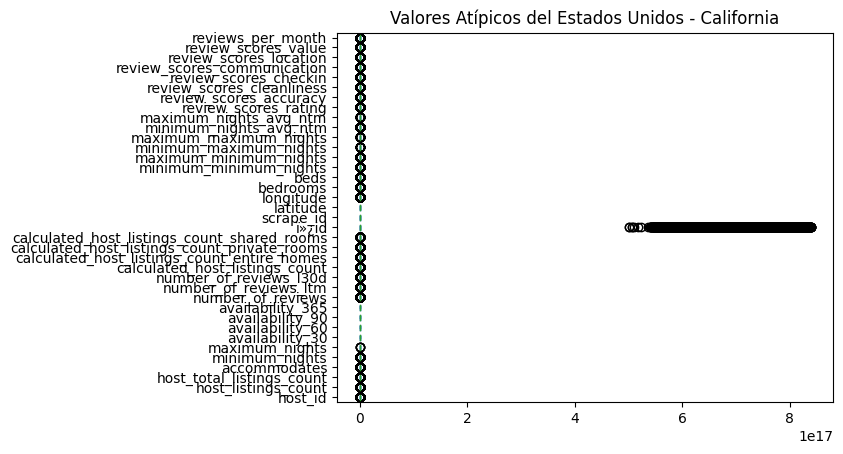

In [ ]:
fig1 = plt.figure(figsize =(15, 8))
EUA_numeros.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Estados Unidos - California")
plt.show()

Considerando lo anterior vamos a aplicar el método para reducir esto.

In [ ]:
y=EUA_numeros

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido host_id                                         4.224914e+08
host_listings_count                             3.850000e+01
host_total_listings_count                       5.700000e+01
accommodates                                    7.000000e+00
minimum_nights                                  7.200000e+01
maximum_nights                                  2.769000e+03
availability_30                                 5.750000e+01
availability_60                                 1.235000e+02
availability_90                                 1.860000e+02
availability_365                                6.605000e+02
number_of_reviews                               1.185000e+02
number_of_reviews_ltm                           2.500000e+01
number_of_reviews_l30d                          2.500000e+00
calculated_host_listings_count                  2.100000e+01
calculated_host_listings_count_entire_homes     5.000000e+00
calculated_host_listings_count_private_rooms    5.000000e+0

In [ ]:
#Encontramos Ouliers
outliers= EUA_numeros[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers

,host_id,host_listings_count,host_total_listings_count,accommodates,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,...,minimum_nights_avg_ntm,maximum_nights_avg_ntm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.44,4.44,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.44
6927,486687635.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6928,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6929,NaN,67.0,86.0,NaN,120.0,NaN,NaN,NaN,NaN,NaN,...,118.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Obtenemos datos limpios del Dataframe
EUA_clean= EUA_numeros[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
EUA_clean

,host_id,host_listings_count,host_total_listings_count,accommodates,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,...,minimum_nights_avg_ntm,maximum_nights_avg_ntm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,1169.0,1.0,1.0,3.0,2.0,30.0,8,22,30,128,...,2.0,1125.0,4.87,4.93,4.92,4.95,4.88,4.98,4.76,2.31
1,8904.0,2.0,2.0,4.0,30.0,60.0,30,60,90,365,...,30.0,60.0,4.88,4.85,4.87,4.89,4.85,4.77,4.68,0.66
2,21994.0,13.0,14.0,1.0,32.0,90.0,30,60,90,365,...,32.0,90.0,4.67,NaN,NaN,4.78,4.78,4.67,4.67,0.09
3,24215.0,2.0,6.0,4.0,9.0,91.0,30,60,90,365,...,9.0,91.0,4.87,4.88,5.00,4.94,5.00,4.94,4.75,0.17
4,7149.0,2.0,2.0,3.0,1.0,26.0,16,45,75,159,...,1.0,26.0,4.91,4.94,4.94,4.95,4.96,4.93,4.74,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6926,222540569.0,7.0,8.0,2.0,1.0,365.0,29,59,89,363,...,1.0,365.0,5.00,5.00,4.89,5.00,5.00,4.56,4.89,NaN
6927,NaN,32.0,38.0,2.0,1.0,1125.0,8,17,47,316,...,1.0,1125.0,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1.00
6928,9835117.0,2.0,7.0,3.0,30.0,365.0,0,0,0,248,...,30.0,365.0,4.80,4.80,4.80,4.90,4.90,4.80,4.70,1.30
6929,226555948.0,NaN,NaN,2.0,NaN,365.0,2,32,62,336,...,NaN,365.0,4.80,4.80,4.80,4.90,4.90,4.80,4.70,1.30


In [ ]:
EUA_cleanf=EUA_clean.copy()
EUA_cleanf=EUA_cleanf.fillna(round(EUA_cleanf.mean(),1))
EUA_cleanf

,host_id,host_listings_count,host_total_listings_count,accommodates,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,...,minimum_nights_avg_ntm,maximum_nights_avg_ntm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,1169.0,1.0,1.0,3.0,2.0,30.0,8,22,30,128,...,2.0,1125.0,4.87,4.93,4.92,4.95,4.88,4.98,4.76,2.31
1,8904.0,2.0,2.0,4.0,30.0,60.0,30,60,90,365,...,30.0,60.0,4.88,4.85,4.87,4.89,4.85,4.77,4.68,0.66
2,21994.0,13.0,14.0,1.0,32.0,90.0,30,60,90,365,...,32.0,90.0,4.67,4.90,4.90,4.78,4.78,4.67,4.67,0.09
3,24215.0,2.0,6.0,4.0,9.0,91.0,30,60,90,365,...,9.0,91.0,4.87,4.88,5.00,4.94,5.00,4.94,4.75,0.17
4,7149.0,2.0,2.0,3.0,1.0,26.0,16,45,75,159,...,1.0,26.0,4.91,4.94,4.94,4.95,4.96,4.93,4.74,0.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6926,222540569.0,7.0,8.0,2.0,1.0,365.0,29,59,89,363,...,1.0,365.0,5.00,5.00,4.89,5.00,5.00,4.56,4.89,0.80
6927,87262817.9,32.0,38.0,2.0,1.0,1125.0,8,17,47,316,...,1.0,1125.0,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1.00
6928,9835117.0,2.0,7.0,3.0,30.0,365.0,0,0,0,248,...,30.0,365.0,4.80,4.80,4.80,4.90,4.90,4.80,4.70,1.30
6929,226555948.0,5.3,7.7,2.0,15.3,365.0,2,32,62,336,...,15.1,365.0,4.80,4.80,4.80,4.90,4.90,4.80,4.70,1.30


<Figure size 1500x800 with 0 Axes>

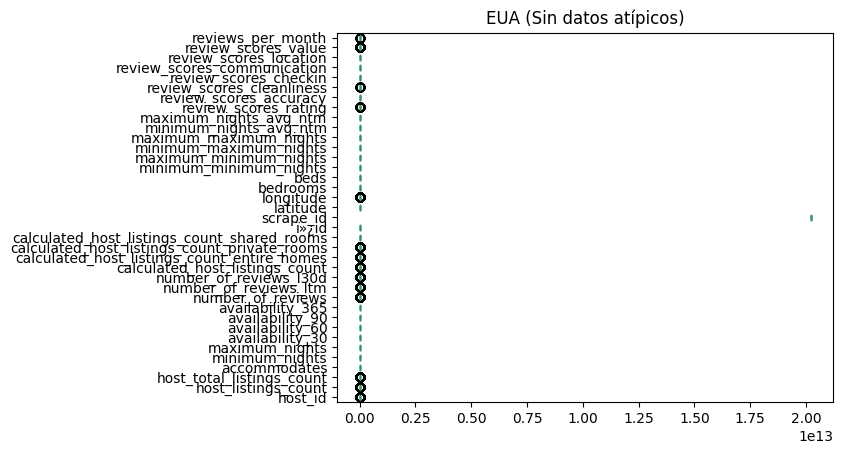

In [ ]:
fig2 = plt.figure(figsize =(15, 8))
EUA_cleanf.plot(kind='box', vert=False)
plt.title("EUA (Sin datos atípicos)")
plt.show() #dibujamos el diagrama

Vemos que la cantidad de valores atipicos disminuyo de manera drástica en la base de datos esto dandonos a entender que limpiamos de manera adecuada los datos. Concatenamos todo el database que se tiene con los numeros y variables cualitativas

In [ ]:
EUA_f=pd.concat([EUA_cleanf, EUA_cuali], axis=1)
EUA_f

,host_id,host_listings_count,host_total_listings_count,accommodates,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,...,bathrooms,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
0,1169.0,1.0,1.0,3.0,2.0,30.0,8,22,30,128,...,1,1 bath,"[""Oven"", ""Self check-in"", ""Cooking basics"", ""L...",$202.00,t,06/03/2023,23/07/2009,19/02/2023,City Registration Pending,f
1,8904.0,2.0,2.0,4.0,30.0,60.0,30,60,90,365,...,1,1 bath,"[""Essentials"", ""Carbon monoxide alarm"", ""Hange...",$235.00,t,06/03/2023,03/05/2009,06/08/2017,STR-0000264,f
2,21994.0,13.0,14.0,1.0,32.0,90.0,30,60,90,365,...,4,4 shared baths,"[""Security cameras on property"", ""Host greets ...",$56.00,t,06/03/2023,08/09/2014,27/10/2022,STR-0000264,f
3,24215.0,2.0,6.0,4.0,9.0,91.0,30,60,90,365,...,15,1.5 baths,"[""Oven"", ""Cooking basics"", ""TV"", ""Smoke alarm""...",$575.00,t,06/03/2023,25/09/2009,28/06/2019,STR-0000264,f
4,7149.0,2.0,2.0,3.0,1.0,26.0,16,45,75,159,...,1,1 private bath,"[""Paid parking garage off premises"", ""Luggage ...",$110.00,t,06/03/2023,01/08/2009,25/02/2023,STR-0000028,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6926,222540569.0,7.0,8.0,2.0,1.0,365.0,29,59,89,363,...,15,1.5 shared baths,"[""Oven"", ""Self check-in"", ""Cooking basics"", ""L...",$83.00,t,06/03/2023,03/02/2023,25/02/2023,2022-012006STR,f
6927,87262817.9,32.0,38.0,2.0,1.0,1125.0,8,17,47,316,...,1,1 private bath,"[""Security cameras on property"", ""Self check-i...",$80.00,t,06/03/2023,13/02/2023,13/02/2023,Exempt,f
6928,9835117.0,2.0,7.0,3.0,30.0,365.0,0,0,0,248,...,1,1 bath,"[""Carbon monoxide alarm"", ""Dishes and silverwa...",$175.00,f,06/03/2023,03/03/2023,03/03/2023,147904,f
6929,226555948.0,5.3,7.7,2.0,15.3,365.0,2,32,62,336,...,1,1 shared bath,"[""Oven"", ""Security cameras on property"", ""Self...",$40.00,t,06/03/2023,03/03/2023,03/03/2023,147904,f


### **España**

#### **Limpieza de los datos**

In [ ]:
Espana.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19655 entries, 0 to 19654
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            19655 non-null  float64
 1   listing_url                                   19655 non-null  object 
 2   scrape_id                                     19655 non-null  float64
 3   last_scraped                                  19655 non-null  object 
 4   source                                        19655 non-null  object 
 5   name                                          19655 non-null  object 
 6   description                                   19632 non-null  object 
 7   neighborhood_overview                         8342 non-null   object 
 8   picture_url                                   19655 non-null  object 
 9   host_id                                       19655 non-null 

In [ ]:
valores_nulos2=Espana.isnull().sum()
print(valores_nulos2)

id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
source                                             0
                                                ... 
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                               5227
Length: 75, dtype: int64


In [ ]:
valores_nulost=Espana.isnull().sum().sum()
print(valores_nulost)

174630


En este caso podemos ver que efectivamente tenemos mucho más datos faltantes en cuestion de esta base de datos, así que realizaremos el mismo procedimiento que en el previo DataFrame para poder tener una limpieza similar. Primero daremos un acercamiento global usando la media y el de utilizar valores anteriores en cuestion de los valores cualitativos y posteriormente haremos un análisis fijo a esas columnas con mayor número de NaN o con valores diferentes.

In [ ]:
Espana1=Espana.copy()

In [ ]:
Espana1=Espana1.fillna(round(Espana.mean(),1))
Espana1.isnull().sum().sum()

<ipython-input-27-c35bd171eba2>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Espana1=Espana1.fillna(round(Espana.mean(),1))


131634

In [ ]:
Espana1=Espana1.fillna(method='bfill')
Espana1.isnull().sum().sum()

59394

In [ ]:
nulos1 = Espana1.isnull().any()
print(Espana1.loc[:,nulos1])

                                   neighborhood_overview  \
0      MontjuÃ¯c is most likely the best neighborhood...   
1      Bonitas playas a 15 minutos en coche. Piscina ...   
2      Sant Climent is a tiny village, with a populat...   
3      Sant Climent is a tiny village, with a populat...   
4      Apartment located outside the town on a small ...   
...                                                  ...   
19650                                                NaN   
19651                                                NaN   
19652                                                NaN   
19653                                                NaN   
19654                                                NaN   

                      host_location  \
0                     Girona, Spain   
1                   Vidreres, Spain   
2                  Catalonia, Spain   
3      Sant Climent Sescebes, Spain   
4                  CataluÃ±a, Spain   
...                             ...   
19650 

En este casi tenemos las mismas columnas que la pasada sin embargo tenemos 7 columnas más siendo así, 10 columnas las cuales vamos a inspeccionar y así decidir que se tendrá que hacer para que la base de datos quede sin valores nulos y poder hacer el procedimeinto de eliminar Outliers.

En la parte de neighbour_group_cleansed, vemos que llega a ser inclusive una columna conjunta a la de neighbourhood_cleansedneigh por lo cual eliminaremos dicha columna. (Usando la lógica del previo ejercicio)

En la de los baños tomaremos los valores de la columan de a lado y usando lambda utilizaremos una expresión regular para eliminar todas las letras. (Usando la lógica del previo ejercicio)

En la tercer columna vemos que no tiene valores, por lo cual la eliminaremos. (Usando la lógica del previo ejercicio)





In [ ]:
Espana1=Espana1.drop(['neighbourhood_group_cleansed', 'calendar_updated'], axis=1)
Espana1.isnull().sum().sum()

20084

In [ ]:
import re
Espana1['bathrooms']=Espana1['bathrooms'].fillna(Espana1['bathrooms_text'])
Espana1['bathrooms'] = Espana1['bathrooms'].apply(lambda x: re.sub('[^0-9]', '', x))
Espana1['bathrooms']

0         1
1        15
2         1
3         1
4         1
         ..
19650     5
19651     1
19652     1
19653     1
19654     1
Name: bathrooms, Length: 19655, dtype: object

In [ ]:
Espana1.isnull().sum().sum()

429

Considerando que ya realizamos este analisis volveremos a ver las columnas que nos faltan en este caso 7 para ver como haremos las sustitución de los datos.

In [ ]:
nulos1_1 = Espana1.isnull().any()
print(Espana1.loc[:,nulos1_1])

                                   neighborhood_overview  \
0      MontjuÃ¯c is most likely the best neighborhood...   
1      Bonitas playas a 15 minutos en coche. Piscina ...   
2      Sant Climent is a tiny village, with a populat...   
3      Sant Climent is a tiny village, with a populat...   
4      Apartment located outside the town on a small ...   
...                                                  ...   
19650                                                NaN   
19651                                                NaN   
19652                                                NaN   
19653                                                NaN   
19654                                                NaN   

                      host_location  \
0                     Girona, Spain   
1                   Vidreres, Spain   
2                  Catalonia, Spain   
3      Sant Climent Sescebes, Spain   
4                  CataluÃ±a, Spain   
...                             ...   
19650 

Considerando la columna de nieghbourhood usaremos los mismos datos de neighborhood_overview

In [ ]:
Espana1['neighbourhood']=Espana1['neighbourhood'].fillna(Espana1['neighborhood_overview'])
Espana1.isnull().sum().sum()

429

En cuestión de las fechas usare la que viene en last screpped considerando que es mucho máss facil tomar una de la misma fila que de otro portafolio.

In [ ]:
Espana1['first_review']=Espana1['first_review'].fillna(Espana1['last_scraped'])
Espana1['last_review']=Espana1['last_review'].fillna(Espana1['last_scraped'])
Espana1.isnull().sum().sum()

55

Considerando el rango tan bajo de nulos que quedan es que eliminaremos esas filas.

In [ ]:
Espana1=Espana1.dropna(axis=0, how='any')
Espana1.isnull().sum().sum()

0

#### **Eliminación de Outliers (Rango Intercuartílico)**

Haciendo diversas actividades así como desarrollando este modelo es que considero que el método de eliminación de outliers considerando que este es un modelo mucho más robusto que el de desviación consisderanod que este puede manejar mejor esos valores atipicos que se tienen dado que tomamos los valores que están por debajo del primer cuartil menos 1.5 veces el rango intercuartílico o por encima del tercer cuartil más 1.5 veces el rango intercuartílico se consideran outliers.

Primeramente solo checaremos los datos númericos y después haremos una visualización de los datos.

In [ ]:
Espana_int=Espana1.select_dtypes(include=['int64'])
Espana_decimales=Espana1.select_dtypes(include=['float'])
Espana_cuali=Espana1.select_dtypes(include=['object'])

Espana_numeros=pd.concat([Espana_int,Espana_decimales],axis=1)
Espana_numeros.isnull().sum()

host_id                                         0
accommodates                                    0
minimum_nights                                  0
maximum_nights                                  0
availability_30                                 0
availability_60                                 0
availability_90                                 0
availability_365                                0
number_of_reviews                               0
number_of_reviews_ltm                           0
number_of_reviews_l30d                          0
calculated_host_listings_count                  0
calculated_host_listings_count_entire_homes     0
calculated_host_listings_count_private_rooms    0
calculated_host_listings_count_shared_rooms     0
id                                              0
scrape_id                                       0
host_listings_count                             0
host_total_listings_count                       0
latitude                                        0


<Figure size 1500x800 with 0 Axes>

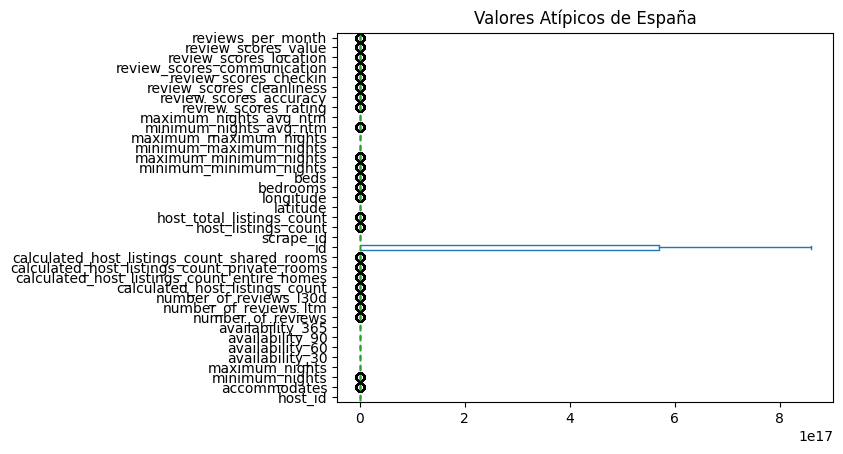

In [ ]:
fig1 = plt.figure(figsize =(15, 8))
Espana_numeros.plot(kind='box', vert=False)
plt.title("Valores Atípicos de España")
plt.show()

Considerando lo anterior vamos a aplicar el método para reducir esto.

In [ ]:
y=Espana_numeros

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido host_id                                         5.298915e+08
accommodates                                    9.000000e+00
minimum_nights                                  1.100000e+01
maximum_nights                                  2.722500e+03
availability_30                                 6.750000e+01
availability_60                                 1.270000e+02
availability_90                                 1.700000e+02
availability_365                                5.805000e+02
number_of_reviews                               3.500000e+01
number_of_reviews_ltm                           1.250000e+01
number_of_reviews_l30d                          0.000000e+00
calculated_host_listings_count                  1.285000e+02
calculated_host_listings_count_entire_homes     1.285000e+02
calculated_host_listings_count_private_rooms    0.000000e+00
calculated_host_listings_count_shared_rooms     0.000000e+00
id                                              1.427026e+1

In [ ]:
#Encontramos Ouliers
outliers= Espana_numeros[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers

,host_id,accommodates,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,...,minimum_nights_avg_ntm,maximum_nights_avg_ntm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19634,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19635,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19636,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19637,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Obtenemos datos limpios del Dataframe
Espana_clean= Espana_numeros[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
Espana_clean

,host_id,accommodates,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,...,minimum_nights_avg_ntm,maximum_nights_avg_ntm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,57237,2.0,1.0,1125,0,0,18,293,NaN,NaN,...,1.0,1125.0,4.82,4.81,4.94,4.89,4.91,4.63,4.74,0.37
1,6586355,2.0,2.0,30,9,39,69,282,NaN,2.0,...,2.0,30.0,4.80,4.76,4.85,4.85,4.91,4.69,4.80,0.51
2,6620645,4.0,2.0,30,23,47,77,315,NaN,4.0,...,2.3,29.1,4.46,4.68,4.31,4.81,4.76,4.74,4.32,0.62
3,3680160,2.0,2.0,21,23,44,65,248,9.0,3.0,...,2.0,1125.0,4.88,4.75,4.50,4.86,5.00,4.63,4.50,0.08
4,180072,4.0,7.0,32,0,0,0,0,11.0,0.0,...,7.0,32.0,4.36,5.00,4.82,4.73,4.73,4.91,4.36,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19634,21668566,4.0,1.0,365,0,0,6,77,0.0,0.0,...,5.5,999.0,4.60,4.60,4.50,4.70,4.70,4.70,4.40,0.50
19635,148547858,4.0,1.0,1125,3,33,63,157,0.0,0.0,...,4.7,1125.0,4.60,4.60,4.50,4.70,4.70,4.70,4.40,0.50
19636,151260158,8.0,2.0,365,22,46,69,209,0.0,0.0,...,2.8,365.0,4.60,4.60,4.50,4.70,4.70,4.70,4.40,0.50
19637,192052905,3.0,5.0,90,0,0,29,152,0.0,0.0,...,5.0,90.0,4.60,4.60,4.50,4.70,4.70,4.70,4.40,0.50


In [ ]:
Espana_cleanf=Espana_clean.copy()
Espana_cleanf=Espana_cleanf.fillna(round(Espana_cleanf.mean(),1))
Espana_cleanf

,host_id,accommodates,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,...,minimum_nights_avg_ntm,maximum_nights_avg_ntm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,57237,2.0,1.0,1125,0,0,18,293,6.0,2.2,...,1.0,1125.0,4.82,4.81,4.94,4.89,4.91,4.63,4.74,0.37
1,6586355,2.0,2.0,30,9,39,69,282,6.0,2.0,...,2.0,30.0,4.80,4.76,4.85,4.85,4.91,4.69,4.80,0.51
2,6620645,4.0,2.0,30,23,47,77,315,6.0,4.0,...,2.3,29.1,4.46,4.68,4.31,4.81,4.76,4.74,4.32,0.62
3,3680160,2.0,2.0,21,23,44,65,248,9.0,3.0,...,2.0,1125.0,4.88,4.75,4.50,4.86,5.00,4.63,4.50,0.08
4,180072,4.0,7.0,32,0,0,0,0,11.0,0.0,...,7.0,32.0,4.36,5.00,4.82,4.73,4.73,4.91,4.36,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19634,21668566,4.0,1.0,365,0,0,6,77,0.0,0.0,...,5.5,999.0,4.60,4.60,4.50,4.70,4.70,4.70,4.40,0.50
19635,148547858,4.0,1.0,1125,3,33,63,157,0.0,0.0,...,4.7,1125.0,4.60,4.60,4.50,4.70,4.70,4.70,4.40,0.50
19636,151260158,8.0,2.0,365,22,46,69,209,0.0,0.0,...,2.8,365.0,4.60,4.60,4.50,4.70,4.70,4.70,4.40,0.50
19637,192052905,3.0,5.0,90,0,0,29,152,0.0,0.0,...,5.0,90.0,4.60,4.60,4.50,4.70,4.70,4.70,4.40,0.50


<Figure size 1500x800 with 0 Axes>

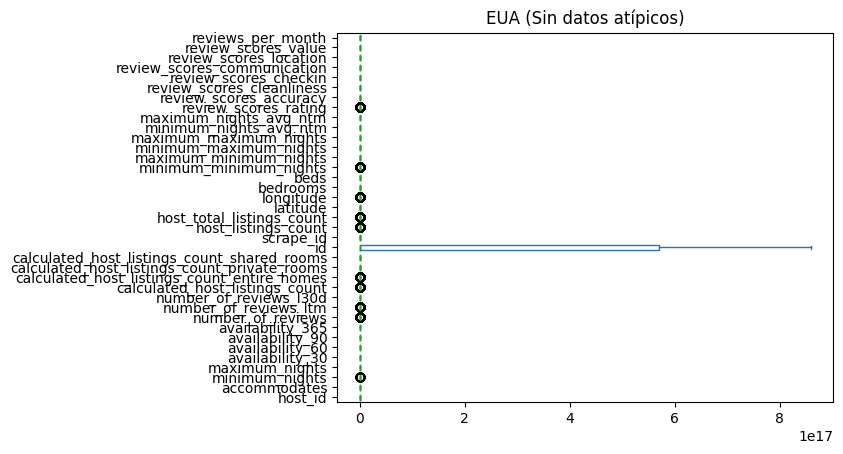

In [ ]:
fig2 = plt.figure(figsize =(15, 8))
Espana_cleanf.plot(kind='box', vert=False)
plt.title("EUA (Sin datos atípicos)")
plt.show() #dibujamos el diagrama

Vemos que la cantidad de valores atipicos disminuyo de manera drástica en la base de datos esto dandonos a entender que limpiamos de manera adecuada los datos. Concatenamos todo el database que se tiene con los numeros y variables cualitativas

In [ ]:
Espana_f=pd.concat([Espana_cleanf,Espana_cuali], axis=1)
Espana_f

,host_id,accommodates,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,...,bathrooms,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
0,57237,2.0,1.0,1125,0,0,18,293,6.0,2.2,...,1,1 private bath,"[""Shared pool"", ""Refrigerator"", ""Long term sta...",$42.00,t,31/03/2023,08/10/2010,27/02/2023,HUTG-049542,f
1,6586355,2.0,2.0,30,9,39,69,282,6.0,2.0,...,15,1.5 shared baths,"[""Free parking on premises"", ""Refrigerator"", ""...",$47.00,t,31/03/2023,01/08/2013,26/06/2022,PG000794,f
2,6620645,4.0,2.0,30,23,47,77,315,6.0,4.0,...,1,1 bath,"[""Air conditioning"", ""Free parking on premises...",$74.00,t,01/04/2023,10/06/2013,30/12/2022,PG000794,f
3,3680160,2.0,2.0,21,23,44,65,248,9.0,3.0,...,1,1 private bath,"[""Hair dryer"", ""Luggage dropoff allowed"", ""Fre...",$45.00,t,31/03/2023,23/08/2013,29/08/2022,PG000794,t
4,180072,4.0,7.0,32,0,0,0,0,11.0,0.0,...,1,1 bath,"[""Free parking on premises"", ""Refrigerator"", ""...",$120.00,t,01/04/2023,14/07/2013,28/08/2021,HUTG-003688,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19634,21668566,4.0,1.0,365,0,0,6,77,0.0,0.0,...,1,1 bath,"[""Air conditioning"", ""Free parking on premises...",$108.00,t,01/04/2023,01/04/2023,01/04/2023,HUTG-068543,t
19635,148547858,4.0,1.0,1125,3,33,63,157,0.0,0.0,...,1,1 bath,"[""Air conditioning"", ""Refrigerator"", ""Microwav...",$60.00,t,01/04/2023,01/04/2023,01/04/2023,HUTG-049206,t
19636,151260158,8.0,2.0,365,22,46,69,209,0.0,0.0,...,25,2.5 baths,"[""Kitchen"", ""Iron"", ""Freezer"", ""Dishwasher"", ""...",$293.00,t,01/04/2023,01/04/2023,01/04/2023,HUTG-067543,t
19637,192052905,3.0,5.0,90,0,0,29,152,0.0,0.0,...,1,1 bath,"[""Kitchen"", ""Air conditioning"", ""Washer"", ""Fre...",$105.00,t,01/04/2023,01/04/2023,01/04/2023,HUTG-043406,f


### **México**

#### **Limpieza de los datos**

In [ ]:
Mexico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24224 entries, 0 to 24223
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            24224 non-null  int64  
 1   listing_url                                   24224 non-null  object 
 2   scrape_id                                     24224 non-null  int64  
 3   last_scraped                                  24224 non-null  object 
 4   source                                        24224 non-null  object 
 5   name                                          24223 non-null  object 
 6   description                                   23296 non-null  object 
 7   neighborhood_overview                         15145 non-null  object 
 8   picture_url                                   24224 non-null  object 
 9   host_id                                       24224 non-null 

In [ ]:
valores_nulos3=Mexico.isnull().sum()
print(valores_nulos3)

id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
source                                             0
                                                ... 
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                               3596
Length: 75, dtype: int64


In [ ]:
valores_nulost=Mexico.isnull().sum().sum()
print(valores_nulost)

189609


En este caso podemos ver que un comportamiento similar al de España, así que realizaremos el mismo proceso para esta base de datos.

In [ ]:
Mexico1=Mexico.copy()

In [ ]:
Mexico1=Mexico1.fillna(round(Mexico.mean(),1))
Mexico1.isnull().sum().sum()

<ipython-input-49-f1addbdb82e5>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Mexico1=Mexico1.fillna(round(Mexico.mean(),1))


159672

In [ ]:
Mexico1=Mexico1.fillna(method='bfill')
Mexico1.isnull().sum().sum()

96986

In [ ]:
nulos2 = Mexico1.isnull().any()
print(Mexico1.loc[:,nulos2])

             host_location                                         host_about  \
0      Mexico City, Mexico  We are from CDMX and moved back and forth to N...   
1      Mexico City, Mexico  We are from CDMX and moved back and forth to N...   
2      Mexico City, Mexico  We are from CDMX and moved back and forth to N...   
3      Mexico City, Mexico  Master in visual arts, film photography & Mark...   
4      Mexico City, Mexico  Condesa Haus  is Bed & Breakfast located on th...   
...                    ...                                                ...   
24219  Mexico City, Mexico  Amo viajar y disfrutar de mis viajes y que mej...   
24220  Mexico City, Mexico  Me considero una persona accesible para mis hu...   
24221  Mexico City, Mexico  Me considero una persona accesible para mis hu...   
24222  Mexico City, Mexico                                                NaN   
24223                  NaN                                                NaN   

      host_response_time ho

En este caso vemos un caso similar al que se tiene en España por lo cual es que haremos el mismo procedimiento en las columnas que ya hemos trabajado.





In [ ]:
Mexico1=Mexico1.drop(['neighbourhood_group_cleansed', 'calendar_updated'], axis=1)
Mexico1.isnull().sum().sum()

48538

In [ ]:
import re
Mexico1['bathrooms']=Mexico1['bathrooms'].fillna(Mexico1['bathrooms_text'])
Mexico1['bathrooms'] = Mexico1['bathrooms'].apply(lambda x: re.sub('[^0-9]', '', x))
Mexico1['bathrooms']

0        15
1         1
2         2
3         1
4        55
         ..
24219     1
24220     1
24221    25
24222     1
24223     1
Name: bathrooms, Length: 24224, dtype: object

In [ ]:
Mexico1.isnull().sum().sum()

24314

In [ ]:
nulos2_1 = Mexico1.isnull().any()
print(Mexico1.loc[:,nulos2_1])

             host_location                                         host_about  \
0      Mexico City, Mexico  We are from CDMX and moved back and forth to N...   
1      Mexico City, Mexico  We are from CDMX and moved back and forth to N...   
2      Mexico City, Mexico  We are from CDMX and moved back and forth to N...   
3      Mexico City, Mexico  Master in visual arts, film photography & Mark...   
4      Mexico City, Mexico  Condesa Haus  is Bed & Breakfast located on th...   
...                    ...                                                ...   
24219  Mexico City, Mexico  Amo viajar y disfrutar de mis viajes y que mej...   
24220  Mexico City, Mexico  Me considero una persona accesible para mis hu...   
24221  Mexico City, Mexico  Me considero una persona accesible para mis hu...   
24222  Mexico City, Mexico                                                NaN   
24223                  NaN                                                NaN   

      host_response_time ho

Considerando la columna de nieghbourhood usaremos los mismos datos de neighborhood_overview

In [ ]:
Mexico1['host_neighbourhood']=Mexico1['host_neighbourhood'].fillna(Mexico1['neighbourhood_cleansed'])
Mexico1.isnull().sum().sum()

24299

Para la columna de licencia le asignare una licencia inventada para poder distingui los que si tenian y los que no.

In [ ]:
Mexico1['license']=Mexico1['license'].fillna('NL000000')
Mexico1.isnull().sum().sum()

75

Considerando el rango tan bajo de nulos que quedan es que eliminaremos esas filas.

In [ ]:
Mexico1=Mexico1.dropna(axis=0, how='any')
Mexico1.isnull().sum().sum()

0

#### **Eliminación de Outliers (Rango Intercuartílico)**

Haciendo diversas actividades así como desarrollando este modelo es que considero que el método de eliminación de outliers considerando que este es un modelo mucho más robusto que el de desviación consisderanod que este puede manejar mejor esos valores atipicos que se tienen dado que tomamos los valores que están por debajo del primer cuartil menos 1.5 veces el rango intercuartílico o por encima del tercer cuartil más 1.5 veces el rango intercuartílico se consideran outliers.

Primeramente solo checaremos los datos númericos y después haremos una visualización de los datos.

In [ ]:
Mexico_int=Mexico1.select_dtypes(include=['int64'])
Mexico_decimales=Mexico1.select_dtypes(include=['float'])
Mexico_cuali=Mexico1.select_dtypes(include=['object'])

Mexico_numeros=pd.concat([Mexico_int,Mexico_decimales],axis=1)
Mexico_numeros.isnull().sum()

id                                              0
scrape_id                                       0
host_id                                         0
host_listings_count                             0
host_total_listings_count                       0
accommodates                                    0
minimum_nights                                  0
maximum_nights                                  0
availability_30                                 0
availability_60                                 0
availability_90                                 0
availability_365                                0
number_of_reviews                               0
number_of_reviews_ltm                           0
number_of_reviews_l30d                          0
calculated_host_listings_count                  0
calculated_host_listings_count_entire_homes     0
calculated_host_listings_count_private_rooms    0
calculated_host_listings_count_shared_rooms     0
latitude                                        0


<Figure size 1500x800 with 0 Axes>

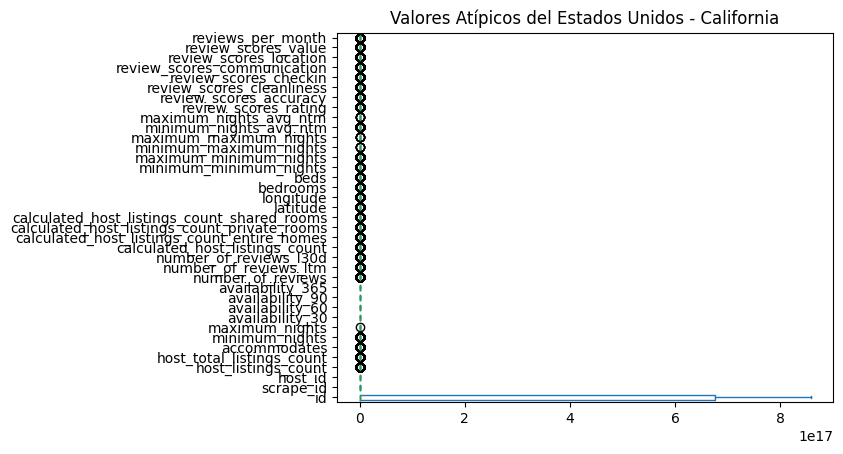

In [ ]:
fig1 = plt.figure(figsize =(15, 8))
Mexico_numeros.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Estados Unidos - California")
plt.show()

Considerando lo anterior vamos a aplicar el método para reducir esto.

In [ ]:
y=Mexico_numeros

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido id                                              1.688067e+18
scrape_id                                       2.023033e+13
host_id                                         6.839189e+08
host_listings_count                             2.850000e+01
host_total_listings_count                       3.200000e+01
accommodates                                    7.000000e+00
minimum_nights                                  3.500000e+00
maximum_nights                                  2.542500e+03
availability_30                                 6.300000e+01
availability_60                                 1.095000e+02
availability_90                                 1.500000e+02
availability_365                                6.740000e+02
number_of_reviews                               1.045000e+02
number_of_reviews_ltm                           4.750000e+01
number_of_reviews_l30d                          5.000000e+00
calculated_host_listings_count                  2.350000e+0

In [ ]:
#Encontramos Ouliers
outliers= Mexico_numeros[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,accommodates,minimum_nights,maximum_nights,availability_30,availability_60,...,minimum_nights_avg_ntm,maximum_nights_avg_ntm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,24.0,NaN,NaN,NaN,...,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,14.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Obtenemos datos limpios del Dataframe
Mexico_clean= Mexico_numeros[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
Mexico_clean

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,accommodates,minimum_nights,maximum_nights,availability_30,availability_60,...,minimum_nights_avg_ntm,maximum_nights_avg_ntm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,2056638,20230329041210,10531228,3.0,7.0,3.0,1.0,1125.0,0,19,...,1.0,1125.0,4.95,4.71,4.95,5.00,4.95,5.00,4.86,0.19
1,2072354,20230329041210,16840050,3.0,3.0,2.0,3.0,1125.0,11,41,...,3.0,1125.0,4.85,4.90,4.88,4.93,5.00,4.95,4.84,0.54
2,696037,20230329041210,3531879,4.0,4.0,6.0,NaN,1125.0,0,0,...,NaN,1125.0,4.57,4.82,4.71,4.92,4.92,4.58,4.71,0.31
3,35797,20230329041210,153786,1.0,1.0,2.0,1.0,7.0,28,58,...,1.0,7.0,4.70,4.80,4.70,4.80,4.80,4.80,4.70,1.70
4,44616,20230329041210,196253,16.0,16.0,NaN,1.0,365.0,30,59,...,1.0,365.0,4.58,4.56,4.70,4.87,4.78,4.98,4.48,0.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24184,856077453562445400,20230329041210,484538652,12.0,12.0,2.0,1.0,365.0,18,45,...,1.0,365.0,4.70,4.80,4.70,4.80,4.80,4.80,4.70,1.70
24185,856087620832913758,20230329041210,501255962,1.0,1.0,4.0,1.0,365.0,29,59,...,1.0,365.0,4.70,4.80,4.70,4.80,4.80,4.80,4.70,1.70
24186,856096385840740213,20230329041210,2086889,1.0,1.0,5.0,2.0,180.0,11,40,...,2.0,180.0,4.70,4.80,4.70,4.80,4.80,4.80,4.70,1.70
24187,856096646292140800,20230329041210,506509461,3.0,3.0,1.0,1.0,40.0,0,29,...,1.0,1125.0,4.70,4.80,4.70,4.80,4.80,4.80,4.70,1.70


In [ ]:
Mexico_cleanf=Mexico_clean.copy()
Mexico_cleanf=Mexico_cleanf.fillna(round(Mexico_cleanf.mean(),1))
Mexico_cleanf

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,accommodates,minimum_nights,maximum_nights,availability_30,availability_60,...,minimum_nights_avg_ntm,maximum_nights_avg_ntm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,2056638,20230329041210,10531228,3.0,7.0,3.0,1.0,1125.0,0,19,...,1.0,1125.0,4.95,4.71,4.95,5.00,4.95,5.00,4.86,0.19
1,2072354,20230329041210,16840050,3.0,3.0,2.0,3.0,1125.0,11,41,...,3.0,1125.0,4.85,4.90,4.88,4.93,5.00,4.95,4.84,0.54
2,696037,20230329041210,3531879,4.0,4.0,6.0,1.6,1125.0,0,0,...,1.8,1125.0,4.57,4.82,4.71,4.92,4.92,4.58,4.71,0.31
3,35797,20230329041210,153786,1.0,1.0,2.0,1.0,7.0,28,58,...,1.0,7.0,4.70,4.80,4.70,4.80,4.80,4.80,4.70,1.70
4,44616,20230329041210,196253,16.0,16.0,2.9,1.0,365.0,30,59,...,1.0,365.0,4.58,4.56,4.70,4.87,4.78,4.98,4.48,0.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24184,856077453562445400,20230329041210,484538652,12.0,12.0,2.0,1.0,365.0,18,45,...,1.0,365.0,4.70,4.80,4.70,4.80,4.80,4.80,4.70,1.70
24185,856087620832913758,20230329041210,501255962,1.0,1.0,4.0,1.0,365.0,29,59,...,1.0,365.0,4.70,4.80,4.70,4.80,4.80,4.80,4.70,1.70
24186,856096385840740213,20230329041210,2086889,1.0,1.0,5.0,2.0,180.0,11,40,...,2.0,180.0,4.70,4.80,4.70,4.80,4.80,4.80,4.70,1.70
24187,856096646292140800,20230329041210,506509461,3.0,3.0,1.0,1.0,40.0,0,29,...,1.0,1125.0,4.70,4.80,4.70,4.80,4.80,4.80,4.70,1.70


<Figure size 1500x800 with 0 Axes>

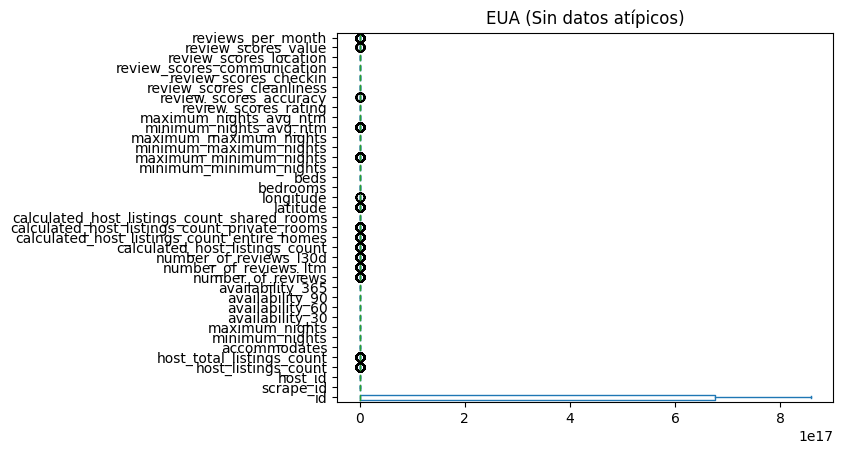

In [ ]:
fig2 = plt.figure(figsize =(15, 8))
Mexico_cleanf.plot(kind='box', vert=False)
plt.title("EUA (Sin datos atípicos)")
plt.show() #dibujamos el diagrama

Vemos que la cantidad de valores atipicos disminuyo de manera drástica en la base de datos esto dandonos a entender que limpiamos de manera adecuada los datos. Concatenamos todo el database que se tiene con los numeros y variables cualitativas

In [ ]:
Mexico_f=pd.concat([Mexico_cleanf,Mexico_cuali], axis=1)
Mexico_f

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,accommodates,minimum_nights,maximum_nights,availability_30,availability_60,...,bathrooms,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
0,2056638,20230329041210,10531228,3.0,7.0,3.0,1.0,1125.0,0,19,...,15,1.5 baths,"[""Wifi"", ""Hangers"", ""Fire extinguisher"", ""Sham...","$1,434.00",t,2023-03-30,2014-01-03,2018-06-24,NL000000,f
1,2072354,20230329041210,16840050,3.0,3.0,2.0,3.0,1125.0,11,41,...,1,1 bath,"[""Free street parking"", ""Cleaning products"", ""...",$830.00,t,2023-03-30,2014-01-01,2022-11-04,NL000000,f
2,696037,20230329041210,3531879,4.0,4.0,6.0,1.6,1125.0,0,0,...,2,2 baths,"[""Wifi \u2013 38 Mbps"", ""Central air condition...","$1,469.00",t,2023-03-29,2012-10-31,2022-12-21,NL000000,f
3,35797,20230329041210,153786,1.0,1.0,2.0,1.0,7.0,28,58,...,1,1 bath,"[""Wifi"", ""Washer"", ""BBQ grill"", ""Indoor firepl...","$3,658.00",t,2023-03-29,2011-11-09,2023-03-26,NL000000,f
4,44616,20230329041210,196253,16.0,16.0,2.9,1.0,365.0,30,59,...,55,5.5 baths,"[""Free street parking"", ""Security cameras on p...","$18,000.00",t,2023-03-30,2011-11-09,2023-03-26,NL000000,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24184,856077453562445400,20230329041210,484538652,12.0,12.0,2.0,1.0,365.0,18,45,...,1,1 bath,"[""Smoke alarm"", ""Luggage dropoff allowed"", ""Co...",$721.00,t,2023-03-30,2023-03-29,2023-03-29,NL000000,t
24185,856087620832913758,20230329041210,501255962,1.0,1.0,4.0,1.0,365.0,29,59,...,1,1 bath,"[""Wifi"", ""Paid parking on premises"", ""Pets all...","$1,400.00",t,2023-03-29,2023-03-29,2023-03-29,NL000000,f
24186,856096385840740213,20230329041210,2086889,1.0,1.0,5.0,2.0,180.0,11,40,...,25,2.5 baths,"[""Stainless steel oven"", ""Smoke alarm"", ""55\"" ...","$1,477.00",t,2023-03-30,2023-03-29,2023-03-29,NL000000,f
24187,856096646292140800,20230329041210,506509461,3.0,3.0,1.0,1.0,40.0,0,29,...,1,1 private bath,"[""Luggage dropoff allowed"", ""Single level home...",$305.00,t,2023-03-30,2023-03-29,2023-03-29,NL000000,t


### **Limpieza de datos**

Consideramos que tenemos columnas especificas que queremos usar es que solo dejare los valores númericos eliminando todas aquellas simbologías en las cuales nos indica esto.

In [ ]:
EUA_f['price'] = EUA_f.price.replace({'\$':''}, regex = True)
EUA_f['price'] = EUA_f.price.replace({'\,':''}, regex = True)
EUA_f['price'] = EUA_f['price'].astype(float)

In [ ]:
EUA_f['host_acceptance_rate']= EUA_f.host_acceptance_rate.replace({'%':''}, regex = True)
EUA_f['host_acceptance_rate'] = EUA_f['host_acceptance_rate'].astype(float)

In [ ]:
EUA_f['host_response_rate']= EUA_f.host_response_rate.replace({'%':''}, regex = True)
EUA_f['host_response_rate'] = EUA_f['host_response_rate'].astype(float)

In [ ]:
Espana_f['price'] = Espana_f.price.replace({'\$':''}, regex = True)
Espana_f['price'] = Espana_f.price.replace({'\,':''}, regex = True)
Espana_f['price'] = Espana_f['price'].astype(float)

In [ ]:
Espana_f['host_acceptance_rate']= Espana_f.host_acceptance_rate.replace({'%':''}, regex = True)
Espana_f['host_acceptance_rate'] = Espana_f['host_acceptance_rate'].astype(float)

In [ ]:
Espana_f['host_response_rate']= Espana_f.host_response_rate.replace({'%':''}, regex = True)
Espana_f['host_response_rate'] = Espana_f['host_response_rate'].astype(float)

In [ ]:
Mexico_f['price'] = Mexico_f.price.replace({'\$':''}, regex = True)
Mexico_f['price'] = Mexico_f.price.replace({'\,':''}, regex = True)
Mexico_f['price'] = Mexico_f['price'].astype(float)

In [ ]:
Mexico_f['host_acceptance_rate']= Mexico_f.host_acceptance_rate.replace({'%':''}, regex = True)
Mexico_f['host_acceptance_rate'] = Mexico_f['host_acceptance_rate'].astype(float)

In [ ]:
Mexico_f['host_response_rate']= Mexico_f.host_response_rate.replace({'%':''}, regex = True)
Mexico_f['host_response_rate'] = Mexico_f['host_response_rate'].astype(float)

### **Bases de datos por cuartos**

In [ ]:
EUA_1 = EUA_f[EUA_f['room_type'] == 'Entire home/apt']
EUA_2 = EUA_f[EUA_f['room_type'] == 'Private room']

Espana_1 = Espana_f[Espana_f['room_type'] == 'Entire home/apt']
Espana_2 = Espana_f[Espana_f['room_type'] == 'Private room']

Mexico_1 = Mexico_f[Mexico_f['room_type'] == 'Entire home/apt']
Mexico_2 = Mexico_f[Mexico_f['room_type'] == 'Private room']

## **Correlación**


### Mexico

#### *Entire Room*

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

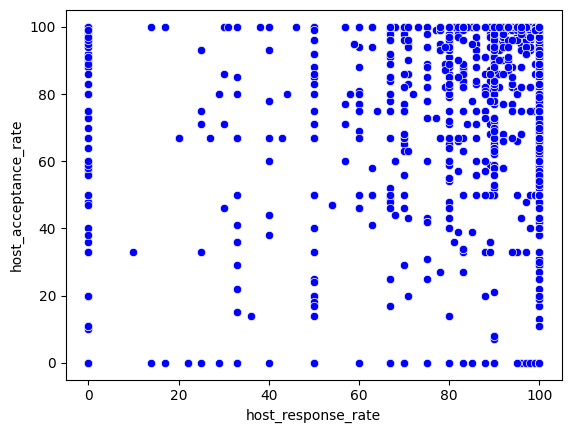

In [421]:
from turtle import color

sns.scatterplot(x = 'host_response_rate', y = 'host_acceptance_rate',color="blue", data=Mexico_1)

In [422]:
Vars_Indep1= Mexico_1[['host_response_rate']]
Var_Dep1= Mexico_1['host_acceptance_rate']

Vars_Indep2= Mexico_1[['review_scores_cleanliness']]
Var_Dep2= Mexico_1['review_scores_location']

Vars_Indep3= Mexico_1[['price']]
Var_Dep3= Mexico_1['host_acceptance_rate']

Vars_Indep4= Mexico_1[['number_of_reviews']]
Var_Dep4= Mexico_1['availability_365']

Vars_Indep5= Mexico_1[['number_of_reviews']]
Var_Dep5= Mexico_1['host_acceptance_rate']

Vars_Indep6= Mexico_1[['review_scores_communication']]
Var_Dep6= Mexico_1['reviews_per_month']

In [423]:
from sklearn.linear_model import LinearRegression
model1_1= LinearRegression()
model1_2= LinearRegression()
model1_3= LinearRegression()
model1_4= LinearRegression()
model1_5= LinearRegression()
model1_6= LinearRegression()

##### Modelos

In [424]:
model1_1.fit(X=Vars_Indep1, y=Var_Dep1)
dic1_1=model1_1.__dict__
det1_1=model1_1.score(Vars_Indep1,Var_Dep1)
corr1_1=np.sqrt(det1_1)

In [425]:
print('Host Acceptance Rate vs Host Response Rate [Entire Room]')
print(dic1_1)
print(det1_1)
print(corr1_1)

Host Acceptance Rate vs Host Response Rate [Entire Room]
{'fit_intercept': True, 'copy_X': True, 'n_jobs': None, 'positive': False, 'feature_names_in_': array(['host_response_rate'], dtype=object), 'n_features_in_': 1, 'coef_': array([0.43043003]), 'rank_': 1, 'singular_': array([1784.67478387]), 'intercept_': 52.06470071611908}
0.12134220723283395
0.3483420836373836


In [426]:
model1_2.fit(X=Vars_Indep2, y=Var_Dep2)
dic1_2=model1_2.__dict__
det1_2=model1_2.score(Vars_Indep2,Var_Dep2)
corr1_2=np.sqrt(det1_2)

In [427]:
print ('Review Scores Cleanliness vs Review Location Scores [Entire Room]')
print(dic1_2)
print(det1_2)
print(corr1_2)

Review Scores Cleanliness vs Review Location Scores [Entire Room]
{'fit_intercept': True, 'copy_X': True, 'n_jobs': None, 'positive': False, 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object), 'n_features_in_': 1, 'coef_': array([0.22187699]), 'rank_': 1, 'singular_': array([18.93904144]), 'intercept_': 3.8169945581777407}
0.08597035932626396
0.29320702468778603


In [428]:
model1_3.fit(X=Vars_Indep3, y=Var_Dep3)
dic1_3=model1_3.__dict__
det1_3=model1_3.score(Vars_Indep3,Var_Dep3)
corr1_3=np.sqrt(det1_3)

In [429]:
print('Host Acceptance Rate vs Price [Entire Room]')
print(dic1_3)
print(det1_3)
print(corr1_3)

Host Acceptance Rate vs Price [Entire Room]
{'fit_intercept': True, 'copy_X': True, 'n_jobs': None, 'positive': False, 'feature_names_in_': array(['price'], dtype=object), 'n_features_in_': 1, 'coef_': array([5.70909307e-06]), 'rank_': 1, 'singular_': array([1828382.1848692]), 'intercept_': 93.5488635836132}
2.240561087052395e-05
0.004733456545752158


In [430]:
model1_4.fit(X=Vars_Indep4, y=Var_Dep4)
dic1_4=model1_4.__dict__
det1_4=model1_4.score(Vars_Indep4,Var_Dep4)
corr1_4=np.sqrt(det1_4)

In [431]:
print('Availability 365 vs Number of Reviews [Entire Room]')
print(dic1_4)
print(det1_4)
print(corr1_4)

Availability 365 vs Number of Reviews [Entire Room]
{'fit_intercept': True, 'copy_X': True, 'n_jobs': None, 'positive': False, 'feature_names_in_': array(['number_of_reviews'], dtype=object), 'n_features_in_': 1, 'coef_': array([-0.31220514]), 'rank_': 1, 'singular_': array([3041.11116616]), 'intercept_': 247.8038023360533}
0.003813047340889719
0.06174987725404577


In [432]:
model1_5.fit(X=Vars_Indep5, y=Var_Dep5)
dic1_5=model1_5.__dict__
det1_5=model1_5.score(Vars_Indep5,Var_Dep5)
corr1_5=np.sqrt(det1_5)

In [433]:
print('Host Acceptance Rate vs Number of Reviews [Entire Room]')
print(dic1_5)
print(det1_5)
print(corr1_5)

Host Acceptance Rate vs Number of Reviews [Entire Room]
{'fit_intercept': True, 'copy_X': True, 'n_jobs': None, 'positive': False, 'feature_names_in_': array(['number_of_reviews'], dtype=object), 'n_features_in_': 1, 'coef_': array([0.1039628]), 'rank_': 1, 'singular_': array([3041.11116616]), 'intercept_': 91.15075227901565}
0.020554604304453106
0.1433687703248274


In [434]:
model1_6.fit(X=Vars_Indep6, y=Var_Dep6)
dic1_6=model1_6.__dict__
det1_6=model1_6.score(Vars_Indep6,Var_Dep6)
corr1_6=np.sqrt(det1_6)

In [435]:
print('Reviews Per Month vs Review Scores Communication [Entire Room]')
print(dic1_6)
print(det1_6)
print(corr1_6)

Reviews Per Month vs Review Scores Communication [Entire Room]
{'fit_intercept': True, 'copy_X': True, 'n_jobs': None, 'positive': False, 'feature_names_in_': array(['review_scores_communication'], dtype=object), 'n_features_in_': 1, 'coef_': array([-0.87033642]), 'rank_': 1, 'singular_': array([14.11683756]), 'intercept_': 5.822032391448582}
0.00870669761521059
0.09330968660975446


#### *Private Room*

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

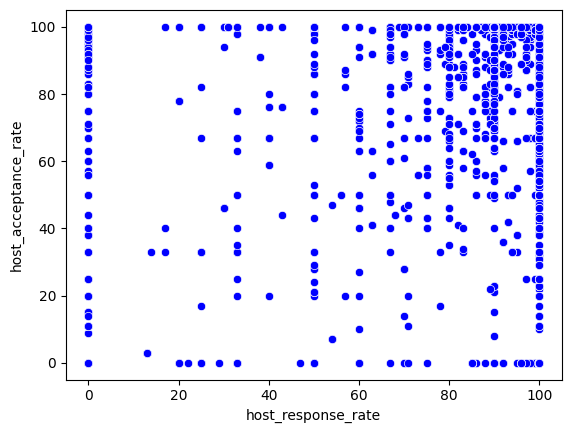

In [436]:
from turtle import color

sns.scatterplot(x = 'host_response_rate', y = 'host_acceptance_rate',color="blue", data=Mexico_2)

In [437]:
Vars_Indep1= Mexico_2[['host_response_rate']]
Var_Dep1= Mexico_2['host_acceptance_rate']

Vars_Indep2= Mexico_2[['review_scores_cleanliness']]
Var_Dep2= Mexico_2['review_scores_location']

Vars_Indep3= Mexico_2[['price']]
Var_Dep3= Mexico_2['host_acceptance_rate']

Vars_Indep4= Mexico_2[['number_of_reviews']]
Var_Dep4= Mexico_2['availability_365']

Vars_Indep5= Mexico_2[['number_of_reviews']]
Var_Dep5= Mexico_2['host_acceptance_rate']

Vars_Indep6= Mexico_2[['review_scores_communication']]
Var_Dep6= Mexico_2['reviews_per_month']

In [438]:
from sklearn.linear_model import LinearRegression
model2_1= LinearRegression()
model2_2= LinearRegression()
model2_3= LinearRegression()
model2_4= LinearRegression()
model2_5= LinearRegression()
model2_6= LinearRegression()

##### Modelos

In [439]:
model2_1.fit(X=Vars_Indep1, y=Var_Dep1)
dic2_1=model2_1.__dict__
det2_1=model2_1.score(Vars_Indep1,Var_Dep1)
corr2_1=np.sqrt(det2_1)

In [440]:
print ('Host Acceptance Rate vs Host Response Rate [Private Room]')
print(dic1_1)
print(det1_1)
print(corr1_1)

Host Acceptance Rate vs Host Response Rate [Private Room]
{'fit_intercept': True, 'copy_X': True, 'n_jobs': None, 'positive': False, 'feature_names_in_': array(['host_response_rate'], dtype=object), 'n_features_in_': 1, 'coef_': array([0.43043003]), 'rank_': 1, 'singular_': array([1784.67478387]), 'intercept_': 52.06470071611908}
0.12134220723283395
0.3483420836373836


In [441]:
model2_2.fit(X=Vars_Indep2, y=Var_Dep2)
dic2_2=model2_2.__dict__
det2_2=model2_2.score(Vars_Indep2,Var_Dep2)
corr2_2=np.sqrt(det2_2)

In [442]:
print ('Review Scores Cleanliness vs Review Location Scores [Private Room]')
print(dic1_2)
print(det1_2)
print(corr1_2)

Review Scores Cleanliness vs Review Location Scores [Private Room]
{'fit_intercept': True, 'copy_X': True, 'n_jobs': None, 'positive': False, 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object), 'n_features_in_': 1, 'coef_': array([0.22187699]), 'rank_': 1, 'singular_': array([18.93904144]), 'intercept_': 3.8169945581777407}
0.08597035932626396
0.29320702468778603


In [443]:
model2_3.fit(X=Vars_Indep3, y=Var_Dep3)
dic2_3=model2_3.__dict__
det2_3=model2_3.score(Vars_Indep3,Var_Dep3)
corr2_3=np.sqrt(det2_3)

In [444]:
print('Host Acceptance Rate vs Price [Private Room]')
print(dic2_3)
print(det2_3)
print(corr2_3)

Host Acceptance Rate vs Price [Private Room]
{'fit_intercept': True, 'copy_X': True, 'n_jobs': None, 'positive': False, 'feature_names_in_': array(['price'], dtype=object), 'n_features_in_': 1, 'coef_': array([-4.00764288e-06]), 'rank_': 1, 'singular_': array([2160829.44561425]), 'intercept_': 87.44190636816298}
1.4154874562244402e-05
0.003762296447948301


In [445]:
model2_4.fit(X=Vars_Indep4, y=Var_Dep4)
dic2_4=model2_4.__dict__
det2_4=model2_4.score(Vars_Indep4,Var_Dep4)
corr2_4=np.sqrt(det2_4)

In [446]:
print('Availability 365 vs Number of Reviews [Private Room]')
print(dic2_4)
print(det2_4)
print(corr2_4)

Availability 365 vs Number of Reviews [Private Room]
{'fit_intercept': True, 'copy_X': True, 'n_jobs': None, 'positive': False, 'feature_names_in_': array(['number_of_reviews'], dtype=object), 'n_features_in_': 1, 'coef_': array([-0.42552486]), 'rank_': 1, 'singular_': array([1916.51007483]), 'intercept_': 259.42219248189235}
0.005179707745353812
0.0719701865035364


In [447]:
model2_5.fit(X=Vars_Indep5, y=Var_Dep5)
dic2_5=model2_5.__dict__
det2_5=model2_5.score(Vars_Indep5,Var_Dep5)
corr2_5=np.sqrt(det2_5)

In [448]:
print('Host Acceptance Rate vs Number of Reviews [Private Room]')
print(dic2_5)
print(det2_5)
print(corr2_5)

Host Acceptance Rate vs Number of Reviews [Private Room]
{'fit_intercept': True, 'copy_X': True, 'n_jobs': None, 'positive': False, 'feature_names_in_': array(['number_of_reviews'], dtype=object), 'n_features_in_': 1, 'coef_': array([0.18104466]), 'rank_': 1, 'singular_': array([1916.51007483]), 'intercept_': 84.70984830200976}
0.02272378588570334
0.1507441073000976


In [449]:
model2_6.fit(X=Vars_Indep6, y=Var_Dep6)
dic2_6=model2_6.__dict__
det2_6=model2_6.score(Vars_Indep6,Var_Dep6)
corr2_6=np.sqrt(det2_6)

In [450]:
print('Reviews Per Month vs Review Scores Communication [Private Room]')
print(dic2_6)
print(det2_6)
print(corr2_6)

Reviews Per Month vs Review Scores Communication [Private Room]
{'fit_intercept': True, 'copy_X': True, 'n_jobs': None, 'positive': False, 'feature_names_in_': array(['review_scores_communication'], dtype=object), 'n_features_in_': 1, 'coef_': array([-2.12263006]), 'rank_': 1, 'singular_': array([10.54122821]), 'intercept_': 11.518301523179208}
0.07194144305702688
0.26821902068463915


In [451]:
datos = {'Determinación': [det1_1, det1_2, det1_3, det1_4, det1_5, det1_6, det2_1, det2_2, det2_3, det2_4, det2_5, det2_6], 'Correlación': [corr1_1, corr1_2, corr1_3, corr1_4, corr1_5, corr1_6, corr2_1, corr2_2, corr2_3, corr2_4, corr2_5, corr2_6]}
df = pd.DataFrame(datos)
df

,Determinación,Correlación
0,0.121342,0.348342
1,0.085970,0.293207
2,0.000022,0.004733
3,0.003813,0.061750
4,0.020555,0.143369
5,0.008707,0.093310
6,0.125335,0.354027
7,0.174424,0.417641
8,0.000014,0.003762
9,0.005180,0.071970


### California

#### *Entire Room*

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

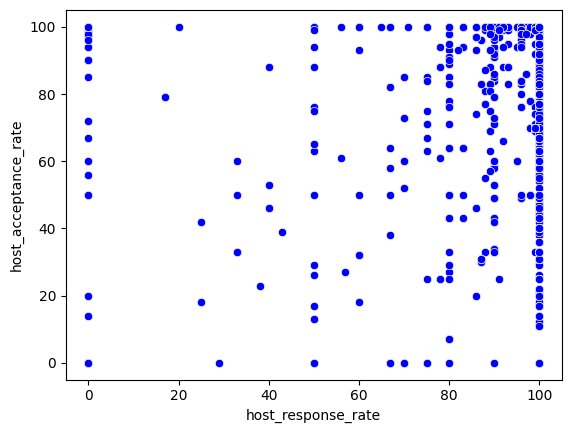

In [452]:
from turtle import color

sns.scatterplot(x = 'host_response_rate', y = 'host_acceptance_rate',color="blue", data=EUA_1)

In [453]:
Vars_Indep1= EUA_1[['host_response_rate']]
Var_Dep1= EUA_1['host_acceptance_rate']

Vars_Indep2= EUA_1[['review_scores_cleanliness']]
Var_Dep2= EUA_1['review_scores_location']

Vars_Indep3= EUA_1[['price']]
Var_Dep3= EUA_1['host_acceptance_rate']

Vars_Indep4= EUA_1[['number_of_reviews']]
Var_Dep4= EUA_1['availability_365']

Vars_Indep5= EUA_1[['number_of_reviews']]
Var_Dep5= EUA_1['host_acceptance_rate']

Vars_Indep6= EUA_1[['review_scores_communication']]
Var_Dep6= EUA_1['reviews_per_month']

In [454]:
from sklearn.linear_model import LinearRegression
model1_1= LinearRegression()
model1_2= LinearRegression()
model1_3= LinearRegression()
model1_4= LinearRegression()
model1_5= LinearRegression()
model1_6= LinearRegression()

##### Modelos

In [455]:
model1_1.fit(X=Vars_Indep1, y=Var_Dep1)
dic1_1=model1_1.__dict__
det1_1=model1_1.score(Vars_Indep1,Var_Dep1)
corr1_1=np.sqrt(det1_1)

In [456]:
print('Host Acceptance Rate vs Host Response Rate [Entire Room]')
print(dic1_1)
print(det1_1)
print(corr1_1)

Host Acceptance Rate vs Host Response Rate [Entire Room]
{'fit_intercept': True, 'copy_X': True, 'n_jobs': None, 'positive': False, 'feature_names_in_': array(['host_response_rate'], dtype=object), 'n_features_in_': 1, 'coef_': array([0.3228849]), 'rank_': 1, 'singular_': array([852.23135865]), 'intercept_': 55.64145117997295}
0.0378432566130924
0.1945334331499149


In [457]:
model1_2.fit(X=Vars_Indep2, y=Var_Dep2)
dic1_2=model1_2.__dict__
det1_2=model1_2.score(Vars_Indep2,Var_Dep2)
corr1_2=np.sqrt(det1_2)

In [458]:
print ('Review Scores Cleanliness vs Review Location Scores [Entire Room]')
print(dic1_2)
print(det1_2)
print(corr1_2)

Review Scores Cleanliness vs Review Location Scores [Entire Room]
{'fit_intercept': True, 'copy_X': True, 'n_jobs': None, 'positive': False, 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object), 'n_features_in_': 1, 'coef_': array([0.2837838]), 'rank_': 1, 'singular_': array([8.17437004]), 'intercept_': 3.4946434131436845}
0.09171461799181879
0.3028442140636317


In [459]:
model1_3.fit(X=Vars_Indep3, y=Var_Dep3)
dic1_3=model1_3.__dict__
det1_3=model1_3.score(Vars_Indep3,Var_Dep3)
corr1_3=np.sqrt(det1_3)

In [460]:
print('Host Acceptance Rate vs Price [Entire Room]')
print(dic1_3)
print(det1_3)
print(corr1_3)

Host Acceptance Rate vs Price [Entire Room]
{'fit_intercept': True, 'copy_X': True, 'n_jobs': None, 'positive': False, 'feature_names_in_': array(['price'], dtype=object), 'n_features_in_': 1, 'coef_': array([-0.00098667]), 'rank_': 1, 'singular_': array([35439.76023804]), 'intercept_': 87.17986434088242}
0.0006110851764298264
0.024720137063330098


In [461]:
model1_4.fit(X=Vars_Indep4, y=Var_Dep4)
dic1_4=model1_4.__dict__
det1_4=model1_4.score(Vars_Indep4,Var_Dep4)
corr1_4=np.sqrt(det1_4)

In [462]:
print('Availability 365 vs Number of Reviews [Entire Room]')
print(dic1_4)
print(det1_4)
print(corr1_4)

Availability 365 vs Number of Reviews [Entire Room]
{'fit_intercept': True, 'copy_X': True, 'n_jobs': None, 'positive': False, 'feature_names_in_': array(['number_of_reviews'], dtype=object), 'n_features_in_': 1, 'coef_': array([-0.52453463]), 'rank_': 1, 'singular_': array([1660.1166072]), 'intercept_': 175.11728357452668}
0.01092217142809182
0.10450919303148322


In [463]:
model1_5.fit(X=Vars_Indep5, y=Var_Dep5)
dic1_5=model1_5.__dict__
det1_5=model1_5.score(Vars_Indep5,Var_Dep5)
corr1_5=np.sqrt(det1_5)

In [464]:
print('Host Acceptance Rate vs Number of Reviews [Entire Room]')
print(dic1_5)
print(det1_5)
print(corr1_5)

Host Acceptance Rate vs Number of Reviews [Entire Room]
{'fit_intercept': True, 'copy_X': True, 'n_jobs': None, 'positive': False, 'feature_names_in_': array(['number_of_reviews'], dtype=object), 'n_features_in_': 1, 'coef_': array([0.07213552]), 'rank_': 1, 'singular_': array([1660.1166072]), 'intercept_': 85.6326055686307}
0.007167266370179837
0.08465970924932259


In [465]:
model1_6.fit(X=Vars_Indep6, y=Var_Dep6)
dic1_6=model1_6.__dict__
det1_6=model1_6.score(Vars_Indep6,Var_Dep6)
corr1_6=np.sqrt(det1_6)

In [466]:
print('Reviews Per Month vs Review Scores Communication [Entire Room]')
print(dic1_6)
print(det1_6)
print(corr1_6)

Reviews Per Month vs Review Scores Communication [Entire Room]
{'fit_intercept': True, 'copy_X': True, 'n_jobs': None, 'positive': False, 'feature_names_in_': array(['review_scores_communication'], dtype=object), 'n_features_in_': 1, 'coef_': array([-2.74254077]), 'rank_': 1, 'singular_': array([3.65591909]), 'intercept_': 14.371734251867789}
0.05391511856841691
0.23219629318405777


#### *Private Room*

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

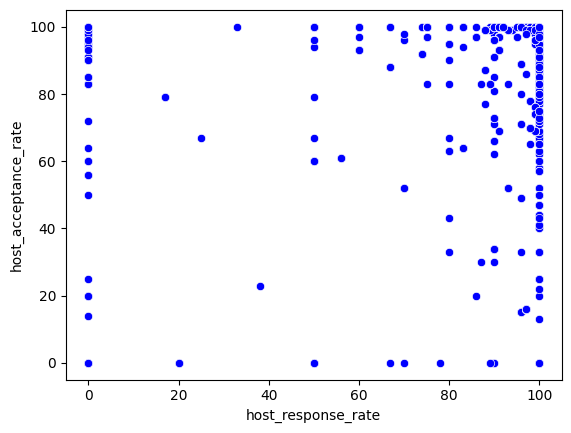

In [467]:
from turtle import color

sns.scatterplot(x = 'host_response_rate', y = 'host_acceptance_rate',color="blue", data=EUA_2)

In [468]:
Vars_Indep1= EUA_2[['host_response_rate']]
Var_Dep1= EUA_2['host_acceptance_rate']

Vars_Indep2= EUA_2[['review_scores_cleanliness']]
Var_Dep2= EUA_2['review_scores_location']

Vars_Indep3= EUA_2[['price']]
Var_Dep3= EUA_2['host_acceptance_rate']

Vars_Indep4= EUA_2[['number_of_reviews']]
Var_Dep4= EUA_2['availability_365']

Vars_Indep5= EUA_2[['number_of_reviews']]
Var_Dep5= EUA_2['host_acceptance_rate']

Vars_Indep6= EUA_2[['review_scores_communication']]
Var_Dep6= EUA_2['reviews_per_month']

In [469]:
from sklearn.linear_model import LinearRegression
model2_1= LinearRegression()
model2_2= LinearRegression()
model2_3= LinearRegression()
model2_4= LinearRegression()
model2_5= LinearRegression()
model2_6= LinearRegression()

##### Modelos

In [470]:
model2_1.fit(X=Vars_Indep1, y=Var_Dep1)
dic2_1=model2_1.__dict__
det2_1=model2_1.score(Vars_Indep1,Var_Dep1)
corr2_1=np.sqrt(det2_1)

In [471]:
print ('Host Acceptance Rate vs Host Response Rate [Private Room]')
print(dic1_1)
print(det1_1)
print(corr1_1)

Host Acceptance Rate vs Host Response Rate [Private Room]
{'fit_intercept': True, 'copy_X': True, 'n_jobs': None, 'positive': False, 'feature_names_in_': array(['host_response_rate'], dtype=object), 'n_features_in_': 1, 'coef_': array([0.3228849]), 'rank_': 1, 'singular_': array([852.23135865]), 'intercept_': 55.64145117997295}
0.0378432566130924
0.1945334331499149


In [472]:
model2_2.fit(X=Vars_Indep2, y=Var_Dep2)
dic2_2=model2_2.__dict__
det2_2=model2_2.score(Vars_Indep2,Var_Dep2)
corr2_2=np.sqrt(det2_2)

In [473]:
print ('Review Scores Cleanliness vs Review Location Scores [Private Room]')
print(dic1_2)
print(det1_2)
print(corr1_2)

Review Scores Cleanliness vs Review Location Scores [Private Room]
{'fit_intercept': True, 'copy_X': True, 'n_jobs': None, 'positive': False, 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object), 'n_features_in_': 1, 'coef_': array([0.2837838]), 'rank_': 1, 'singular_': array([8.17437004]), 'intercept_': 3.4946434131436845}
0.09171461799181879
0.3028442140636317


In [474]:
model2_3.fit(X=Vars_Indep3, y=Var_Dep3)
dic2_3=model2_3.__dict__
det2_3=model2_3.score(Vars_Indep3,Var_Dep3)
corr2_3=np.sqrt(det2_3)

In [475]:
print('Host Acceptance Rate vs Price [Private Room]')
print(dic2_3)
print(det2_3)
print(corr2_3)

Host Acceptance Rate vs Price [Private Room]
{'fit_intercept': True, 'copy_X': True, 'n_jobs': None, 'positive': False, 'feature_names_in_': array(['price'], dtype=object), 'n_features_in_': 1, 'coef_': array([-0.00040425]), 'rank_': 1, 'singular_': array([97251.08635392]), 'intercept_': 90.20767831043497}
0.0016092610755724657
0.04011559641302203


In [476]:
model2_4.fit(X=Vars_Indep4, y=Var_Dep4)
dic2_4=model2_4.__dict__
det2_4=model2_4.score(Vars_Indep4,Var_Dep4)
corr2_4=np.sqrt(det2_4)

In [477]:
print('Availability 365 vs Number of Reviews [Private Room]')
print(dic2_4)
print(det2_4)
print(corr2_4)

Availability 365 vs Number of Reviews [Private Room]
{'fit_intercept': True, 'copy_X': True, 'n_jobs': None, 'positive': False, 'feature_names_in_': array(['number_of_reviews'], dtype=object), 'n_features_in_': 1, 'coef_': array([-0.54449865]), 'rank_': 1, 'singular_': array([1293.06478458]), 'intercept_': 187.97222871008003}
0.011496725656031992
0.10722278515330588


In [478]:
model2_5.fit(X=Vars_Indep5, y=Var_Dep5)
dic2_5=model2_5.__dict__
det2_5=model2_5.score(Vars_Indep5,Var_Dep5)
corr2_5=np.sqrt(det2_5)

In [479]:
print('Host Acceptance Rate vs Number of Reviews [Private Room]')
print(dic2_5)
print(det2_5)
print(corr2_5)

Host Acceptance Rate vs Number of Reviews [Private Room]
{'fit_intercept': True, 'copy_X': True, 'n_jobs': None, 'positive': False, 'feature_names_in_': array(['number_of_reviews'], dtype=object), 'n_features_in_': 1, 'coef_': array([0.09526398]), 'rank_': 1, 'singular_': array([1293.06478458]), 'intercept_': 88.15420568056746}
0.01579904424350609
0.12569424904706694


In [480]:
model2_6.fit(X=Vars_Indep6, y=Var_Dep6)
dic2_6=model2_6.__dict__
det2_6=model2_6.score(Vars_Indep6,Var_Dep6)
corr2_6=np.sqrt(det2_6)

In [481]:
print('Reviews Per Month vs Review Scores Communication [Private Room]')
print(dic2_6)
print(det2_6)
print(corr2_6)

Reviews Per Month vs Review Scores Communication [Private Room]
{'fit_intercept': True, 'copy_X': True, 'n_jobs': None, 'positive': False, 'feature_names_in_': array(['review_scores_communication'], dtype=object), 'n_features_in_': 1, 'coef_': array([-2.5952765]), 'rank_': 1, 'singular_': array([2.75047141]), 'intercept_': 13.684436765089254}
0.049060696108712776
0.2214964923169502


In [482]:
datos = {'Determinación': [det1_1, det1_2, det1_3, det1_4, det1_5, det1_6, det2_1, det2_2, det2_3, det2_4, det2_5, det2_6], 'Correlación': [corr1_1, corr1_2, corr1_3, corr1_4, corr1_5, corr1_6, corr2_1, corr2_2, corr2_3, corr2_4, corr2_5, corr2_6]}
df = pd.DataFrame(datos)
df

,Determinación,Correlación
0,0.037843,0.194533
1,0.091715,0.302844
2,0.000611,0.024720
3,0.010922,0.104509
4,0.007167,0.084660
5,0.053915,0.232196
6,0.013741,0.117220
7,0.058813,0.242513
8,0.001609,0.040116
9,0.011497,0.107223


### España


#### *Entire Room*

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

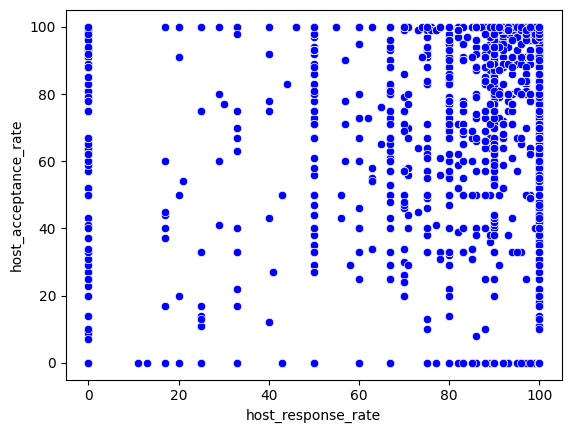

In [483]:
from turtle import color

sns.scatterplot(x = 'host_response_rate', y = 'host_acceptance_rate',color="blue", data=Espana_1)

In [484]:
Vars_Indep1= Espana_1[['host_response_rate']]
Var_Dep1= Espana_1['host_acceptance_rate']

Vars_Indep2= Espana_1[['review_scores_cleanliness']]
Var_Dep2= Espana_1['review_scores_location']

Vars_Indep3= Espana_1[['price']]
Var_Dep3= Espana_1['host_acceptance_rate']

Vars_Indep4= Espana_1[['number_of_reviews']]
Var_Dep4= Espana_1['availability_365']

Vars_Indep5= Espana_1[['number_of_reviews']]
Var_Dep5= Espana_1['host_acceptance_rate']

Vars_Indep6= Espana_1[['review_scores_communication']]
Var_Dep6= Espana_1['reviews_per_month']

In [485]:
from sklearn.linear_model import LinearRegression
model1_1= LinearRegression()
model1_2= LinearRegression()
model1_3= LinearRegression()
model1_4= LinearRegression()
model1_5= LinearRegression()
model1_6= LinearRegression()

##### Modelos

In [486]:
model1_1.fit(X=Vars_Indep1, y=Var_Dep1)
dic1_1=model1_1.__dict__
det1_1=model1_1.score(Vars_Indep1,Var_Dep1)
corr1_1=np.sqrt(det1_1)

In [487]:
print('Host Acceptance Rate vs Host Response Rate [Entire Room]')
print(dic1_1)
print(det1_1)
print(corr1_1)

Host Acceptance Rate vs Host Response Rate [Entire Room]
{'fit_intercept': True, 'copy_X': True, 'n_jobs': None, 'positive': False, 'feature_names_in_': array(['host_response_rate'], dtype=object), 'n_features_in_': 1, 'coef_': array([0.37598182]), 'rank_': 1, 'singular_': array([2080.74832743]), 'intercept_': 54.13553182694535}
0.08244261932747143
0.2871282280227276


In [488]:
model1_2.fit(X=Vars_Indep2, y=Var_Dep2)
dic1_2=model1_2.__dict__
det1_2=model1_2.score(Vars_Indep2,Var_Dep2)
corr1_2=np.sqrt(det1_2)

In [489]:
print ('Review Scores Cleanliness vs Review Location Scores [Entire Room]')
print(dic1_2)
print(det1_2)
print(corr1_2)

Review Scores Cleanliness vs Review Location Scores [Entire Room]
{'fit_intercept': True, 'copy_X': True, 'n_jobs': None, 'positive': False, 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object), 'n_features_in_': 1, 'coef_': array([0.17218404]), 'rank_': 1, 'singular_': array([36.63894928]), 'intercept_': 3.99992358290003}
0.08450839518411468
0.2907032768719931


In [490]:
model1_3.fit(X=Vars_Indep3, y=Var_Dep3)
dic1_3=model1_3.__dict__
det1_3=model1_3.score(Vars_Indep3,Var_Dep3)
corr1_3=np.sqrt(det1_3)

In [491]:
print('Host Acceptance Rate vs Price [Entire Room]')
print(dic1_3)
print(det1_3)
print(corr1_3)

Host Acceptance Rate vs Price [Entire Room]
{'fit_intercept': True, 'copy_X': True, 'n_jobs': None, 'positive': False, 'feature_names_in_': array(['price'], dtype=object), 'n_features_in_': 1, 'coef_': array([-0.00042178]), 'rank_': 1, 'singular_': array([73522.70790648]), 'intercept_': 89.76946858653596}
0.00012953990023567563
0.011381559657431648


In [492]:
model1_4.fit(X=Vars_Indep4, y=Var_Dep4)
dic1_4=model1_4.__dict__
det1_4=model1_4.score(Vars_Indep4,Var_Dep4)
corr1_4=np.sqrt(det1_4)

In [493]:
print('Availability 365 vs Number of Reviews [Entire Room]')
print(dic1_4)
print(det1_4)
print(corr1_4)

Availability 365 vs Number of Reviews [Entire Room]
{'fit_intercept': True, 'copy_X': True, 'n_jobs': None, 'positive': False, 'feature_names_in_': array(['number_of_reviews'], dtype=object), 'n_features_in_': 1, 'coef_': array([0.71066966]), 'rank_': 1, 'singular_': array([1024.40746285]), 'intercept_': 186.14650068200638}
0.002315514550286335
0.04811979374733785


In [494]:
model1_5.fit(X=Vars_Indep5, y=Var_Dep5)
dic1_5=model1_5.__dict__
det1_5=model1_5.score(Vars_Indep5,Var_Dep5)
corr1_5=np.sqrt(det1_5)

In [495]:
print('Host Acceptance Rate vs Number of Reviews [Entire Room]')
print(dic1_5)
print(det1_5)
print(corr1_5)

Host Acceptance Rate vs Number of Reviews [Entire Room]
{'fit_intercept': True, 'copy_X': True, 'n_jobs': None, 'positive': False, 'feature_names_in_': array(['number_of_reviews'], dtype=object), 'n_features_in_': 1, 'coef_': array([0.05738852]), 'rank_': 1, 'singular_': array([1024.40746285]), 'intercept_': 89.33117806292941}
0.0004655587541562145
0.021576810564961045


In [496]:
model1_6.fit(X=Vars_Indep6, y=Var_Dep6)
dic1_6=model1_6.__dict__
det1_6=model1_6.score(Vars_Indep6,Var_Dep6)
corr1_6=np.sqrt(det1_6)

In [497]:
print('Reviews Per Month vs Review Scores Communication [Entire Room]')
print(dic1_6)
print(det1_6)
print(corr1_6)

Reviews Per Month vs Review Scores Communication [Entire Room]
{'fit_intercept': True, 'copy_X': True, 'n_jobs': None, 'positive': False, 'feature_names_in_': array(['review_scores_communication'], dtype=object), 'n_features_in_': 1, 'coef_': array([-0.19077342]), 'rank_': 1, 'singular_': array([22.75481429]), 'intercept_': 1.277236439697428}
0.02148510802589687
0.14657799297949495


#### *Private Room*

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

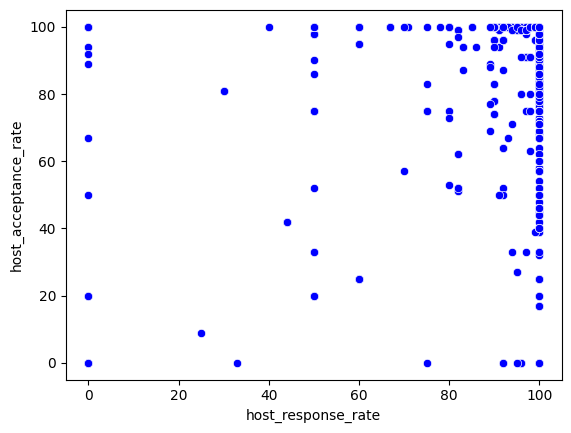

In [498]:
from turtle import color

sns.scatterplot(x = 'host_response_rate', y = 'host_acceptance_rate',color="blue", data=Espana_2)

In [499]:
Vars_Indep1= Espana_2[['host_response_rate']]
Var_Dep1= Espana_2['host_acceptance_rate']

Vars_Indep2= Espana_2[['review_scores_cleanliness']]
Var_Dep2= Espana_2['review_scores_location']

Vars_Indep3= Espana_2[['price']]
Var_Dep3= Espana_2['host_acceptance_rate']

Vars_Indep4= Espana_2[['number_of_reviews']]
Var_Dep4= Espana_2['availability_365']

Vars_Indep5= Espana_2[['number_of_reviews']]
Var_Dep5= Espana_2['host_acceptance_rate']

Vars_Indep6= Espana_2[['review_scores_communication']]
Var_Dep6= Espana_2['reviews_per_month']

In [500]:
from sklearn.linear_model import LinearRegression
model2_1= LinearRegression()
model2_2= LinearRegression()
model2_3= LinearRegression()
model2_4= LinearRegression()
model2_5= LinearRegression()
model2_6= LinearRegression()

##### Modelos

In [501]:
model2_1.fit(X=Vars_Indep1, y=Var_Dep1)
dic2_1=model2_1.__dict__
det2_1=model2_1.score(Vars_Indep1,Var_Dep1)
corr2_1=np.sqrt(det2_1)

In [502]:
print ('Host Acceptance Rate vs Host Response Rate [Private Room]')
print(dic1_1)
print(det1_1)
print(corr1_1)

Host Acceptance Rate vs Host Response Rate [Private Room]
{'fit_intercept': True, 'copy_X': True, 'n_jobs': None, 'positive': False, 'feature_names_in_': array(['host_response_rate'], dtype=object), 'n_features_in_': 1, 'coef_': array([0.37598182]), 'rank_': 1, 'singular_': array([2080.74832743]), 'intercept_': 54.13553182694535}
0.08244261932747143
0.2871282280227276


In [503]:
model2_2.fit(X=Vars_Indep2, y=Var_Dep2)
dic2_2=model2_2.__dict__
det2_2=model2_2.score(Vars_Indep2,Var_Dep2)
corr2_2=np.sqrt(det2_2)

In [504]:
print ('Review Scores Cleanliness vs Review Location Scores [Private Room]')
print(dic1_2)
print(det1_2)
print(corr1_2)

Review Scores Cleanliness vs Review Location Scores [Private Room]
{'fit_intercept': True, 'copy_X': True, 'n_jobs': None, 'positive': False, 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object), 'n_features_in_': 1, 'coef_': array([0.17218404]), 'rank_': 1, 'singular_': array([36.63894928]), 'intercept_': 3.99992358290003}
0.08450839518411468
0.2907032768719931


In [505]:
model2_3.fit(X=Vars_Indep3, y=Var_Dep3)
dic2_3=model2_3.__dict__
det2_3=model2_3.score(Vars_Indep3,Var_Dep3)
corr2_3=np.sqrt(det2_3)

In [506]:
print('Host Acceptance Rate vs Price [Private Room]')
print(dic2_3)
print(det2_3)
print(corr2_3)

Host Acceptance Rate vs Price [Private Room]
{'fit_intercept': True, 'copy_X': True, 'n_jobs': None, 'positive': False, 'feature_names_in_': array(['price'], dtype=object), 'n_features_in_': 1, 'coef_': array([0.00117595]), 'rank_': 1, 'singular_': array([18158.61975986]), 'intercept_': 86.875033374773}
0.0006333140927103909
0.025165732508917574


In [507]:
model2_4.fit(X=Vars_Indep4, y=Var_Dep4)
dic2_4=model2_4.__dict__
det2_4=model2_4.score(Vars_Indep4,Var_Dep4)
corr2_4=np.sqrt(det2_4)

In [508]:
print('Availability 365 vs Number of Reviews [Private Room]')
print(dic2_4)
print(det2_4)
print(corr2_4)

Availability 365 vs Number of Reviews [Private Room]
{'fit_intercept': True, 'copy_X': True, 'n_jobs': None, 'positive': False, 'feature_names_in_': array(['number_of_reviews'], dtype=object), 'n_features_in_': 1, 'coef_': array([0.02205947]), 'rank_': 1, 'singular_': array([272.47693266]), 'intercept_': 212.24256583196762}
2.0395513942172983e-06
0.0014281286336381952


In [509]:
model2_5.fit(X=Vars_Indep5, y=Var_Dep5)
dic2_5=model2_5.__dict__
det2_5=model2_5.score(Vars_Indep5,Var_Dep5)
corr2_5=np.sqrt(det2_5)

In [510]:
print('Host Acceptance Rate vs Number of Reviews [Private Room]')
print(dic2_5)
print(det2_5)
print(corr2_5)

Host Acceptance Rate vs Number of Reviews [Private Room]
{'fit_intercept': True, 'copy_X': True, 'n_jobs': None, 'positive': False, 'feature_names_in_': array(['number_of_reviews'], dtype=object), 'n_features_in_': 1, 'coef_': array([0.18680326]), 'rank_': 1, 'singular_': array([272.47693266]), 'intercept_': 86.00784637021319}
0.0035983307864224656
0.05998608827405289


In [511]:
model2_6.fit(X=Vars_Indep6, y=Var_Dep6)
dic2_6=model2_6.__dict__
det2_6=model2_6.score(Vars_Indep6,Var_Dep6)
corr2_6=np.sqrt(det2_6)

In [512]:
print('Reviews Per Month vs Review Scores Communication [Private Room]')
print(dic2_6)
print(det2_6)
print(corr2_6)

Reviews Per Month vs Review Scores Communication [Private Room]
{'fit_intercept': True, 'copy_X': True, 'n_jobs': None, 'positive': False, 'feature_names_in_': array(['review_scores_communication'], dtype=object), 'n_features_in_': 1, 'coef_': array([-0.3441721]), 'rank_': 1, 'singular_': array([5.36276345]), 'intercept_': 2.064570187904085}
0.06829459865121024
0.26133235285974493


In [513]:
datos = {'Determinación': [det1_1, det1_2, det1_3, det1_4, det1_5, det1_6, det2_1, det2_2, det2_3, det2_4, det2_5, det2_6], 'Correlación': [corr1_1, corr1_2, corr1_3, corr1_4, corr1_5, corr1_6, corr2_1, corr2_2, corr2_3, corr2_4, corr2_5, corr2_6]}
df = pd.DataFrame(datos)
df

,Determinación,Correlación
0,0.082443,0.287128
1,0.084508,0.290703
2,0.000130,0.011382
3,0.002316,0.048120
4,0.000466,0.021577
5,0.021485,0.146578
6,0.126501,0.355669
7,0.150319,0.387710
8,0.000633,0.025166
9,0.000002,0.001428
